# Analysis

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload module is not an IPython extension.


UsageError: Line magic function `%autoreload` not found.


In [7]:
# set up plotting settings for dark mode.
import os
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_settings import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [3]:
import xarray as xr

In [5]:
from src.constants import OCEAN_DATA_PATH

In [8]:
os.listdir(OCEAN_DATA_PATH)

['dQdf-sample.nc',
 'om_mask.nc',
 'qflx.nc',
 'tau-ECMWF.y',
 'sst-ECMWF-clim.nc',
 'tau-ECMWF.x',
 'dQdT-sample.nc',
 'qflx-0.nc',
 'tau-ECMWF-clim.x',
 'tau-ECMWF-clim.y',
 'qflx-3.nc',
 'qflx-test.nc',
 'qflx1.nc',
 'ipynb-test.nc',
 'ipynb-test2.nc',
 'ipynb-test3.nc',
 'qflx-backup.nc',
 'rzk.pro',
 'spline_ECMWF.txt']

In [11]:
ds = 

In [27]:
from typing import Union

def fix_calendar(xr_in: Union[xr.Dataset, xr.DataArray], timevar: str = "T"):
    if isinstance(xr_in, xr.DataArray):
        ds = xr_in.to_dataset()
    else:
        ds = xr_in
    if ds[timevar].attrs["calendar"] == "360":
        ds[timevar].attrs["calendar"] = "360_day"
    ds = xr.decode_cf(ds)
    if isinstance(xr_in, xr.DataArray):
        xr_out = ds.to_array()
    else:
        xr_out = ds
    return xr_out

ds_new = fix_calendar(xr.open_dataset(OCEAN_DATA_PATH / "qflx.nc", decode_times=False))
da_new = fix_calendar(xr.open_dataset(OCEAN_DATA_PATH / "qflx.nc", decode_times=False).qflx)

In [28]:
print(ds_new)
print(da_new)

<xarray.Dataset>
Dimensions:  (T: 12, X: 360, Y: 181, Z: 1)
Coordinates:
  * Z        (Z) float32 1.0
  * T        (T) object 1960-01-16 00:00:00 ... 1960-12-16 00:00:00
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    qflx     (T, Z, Y, X) float32 ...
<xarray.DataArray (variable: 1, T: 12, Z: 1, Y: 181, X: 360)>
array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ...

In [ ]:
xr.open_dataset(OCEAN_DATA_PATH / "qflx.nc", decode_times=False)

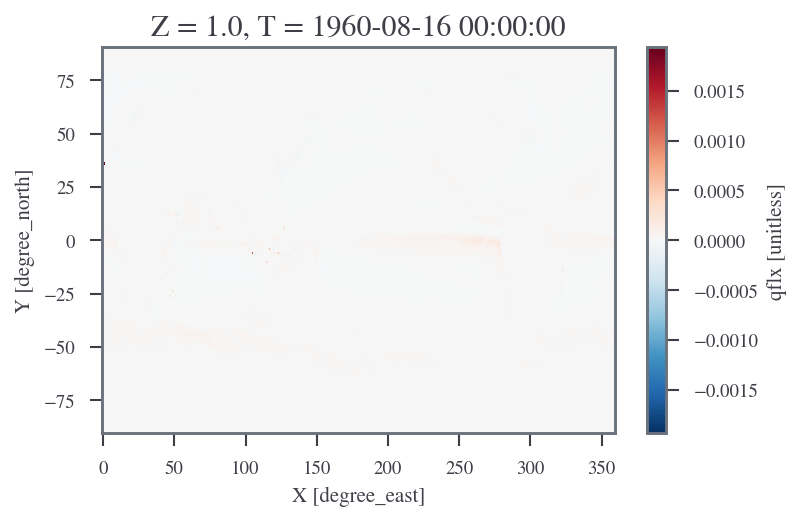

In [21]:
ds.qflx.isel(T=7, Z=0).plot()